# Project Title

##### Effect of Various Data Imputation Methods on Class Imbalance Problem.

# Data

There are three publically available datasets which will be used to explain the concepts:

* 1. [Heart Disease Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)
* 2. [Stroke Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)
* 3. [Software Defect Dataset](https://zenodo.org/record/2591761#.YrXL7HbMJEZ)




In [1]:
# Installing required package
!pip install imblearn
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=bd8e23709143bb5eecb0708a269034fb4ddab091aabb7acb783bc26188686e09
  Stored in directory: c:\users\darshitkumar patel\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


# Loading necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn import metrics

from imblearn.over_sampling import SMOTE

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Heart Disease Dataset

## Reading in the Dataset

In [4]:
df_heart = pd.read_csv("Heart Disease.csv")

In [5]:
df_heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Checking duplicate entries in the datasets.

In [6]:
df_heart.duplicated().any()

False

>The heart disease dataset does not have any duplicate entries. Good to go for the next step.

### Examining the Target column 

>For each patient in the dataset, we need to create a model that predicts whether or not the patients have heart disease. Hence Heart Disease is that target column in the dataset. Let's examine the Distribution of the target column.

In [7]:
df_heart['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

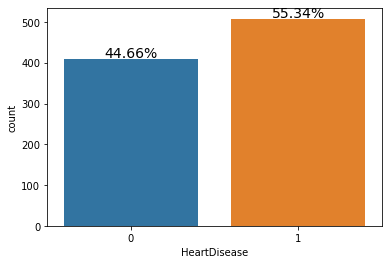

In [8]:
s = sns.countplot(x = 'HeartDisease',data = df_heart)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(df_heart)*100),
            ha="center", fontsize=14)

Here:
* 0: No Heart Disease while 
* 1: Heart Disease. 

Clearly, less people have Heart Disease.

### Checking Missing Values

Checking if dataset have any missing values or not. If dataset don't have any missing values we will stimulate missing values. 

In [9]:
df_heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Splitting the datasets into train and test sets

In [10]:
def TrainTestSplit(df):
    
    # Split df into X and y
    y= df[df.columns[-1]]
    X= df.drop(df.columns[-1], axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)
    
    return X_train, X_test, y_train, y_test

In [11]:
# Applying TrainTestSplit function to heart disease dataset
X_train_heart, X_test_heart, y_train_heart, y_test_heart = TrainTestSplit(df_heart)

## Stimulate missing values

Stimulate missing values only in training set of the dataset.

Create a function to stimulate missing values with missingness fraction of 1%, 10%, 30% and 50%.

In [12]:
def missing_values(df):
    
    df_1 = df.copy()
    # for Missingness fraction of 1%
    for col in df_1.columns:
        df_1.loc[df_1.sample(frac=0.01).index, col] = np.nan
        
    df_10 = df.copy()
    # for Missingness fraction of 1%
    for col in df_10.columns:
        df_10.loc[df_10.sample(frac=0.1).index, col] = np.nan
    
    df_30 = df.copy()
    # for Missingness fraction of 1%
    for col in df_30.columns:
        df_30.loc[df_30.sample(frac=0.3).index, col] = np.nan
    
    df_50 = df.copy()
    # for Missingness fraction of 1%
    for col in df_50.columns:
        df_50.loc[df_50.sample(frac=0.5).index, col] = np.nan
   
    # Return the dataframe with missing information
    return df_1, df_10, df_30, df_50

This function will be applied on feature set of training set.

In [13]:
# Applying above function on training set of heart disease dataset
X_train_heart_1, X_train_heart_10, X_train_heart_30, X_train_heart_50 = missing_values(X_train_heart)

Check the missingness fraction

In [14]:
# Heart disease training set
print('For Heart Disease training set')
print('  X_train_heart_1 =',(X_train_heart_1.isna().sum()*100/len(X_train_heart)).mean())
print('  X_train_heart_10 =',(X_train_heart_10.isna().sum()*100/len(X_train_heart)).mean())
print('  X_train_heart_30 =',(X_train_heart_30.isna().sum()*100/len(X_train_heart)).mean())
print('  X_train_heart_50 =',(X_train_heart_50.isna().sum()*100/len(X_train_heart)).mean())

For Heart Disease training set
  X_train_heart_1 = 0.9536784741144415
  X_train_heart_10 = 9.94550408719346
  X_train_heart_30 = 29.972752043596735
  X_train_heart_50 = 50.0


Visualize newly formed datasets.

<AxesSubplot:>

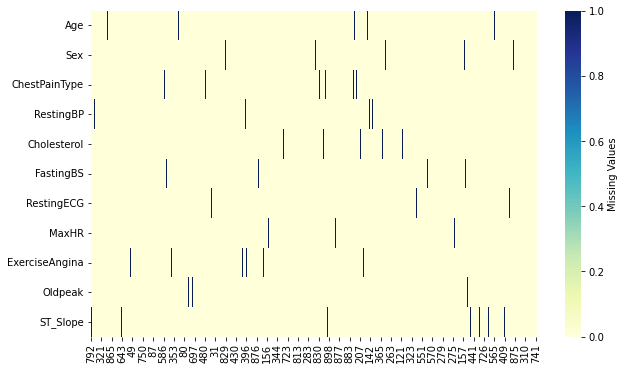

In [15]:
#Visualizing heatmap for missing in dataframe

plt.figure(figsize=(10,6))
sns.heatmap(X_train_heart_1.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Values'})

<AxesSubplot:>

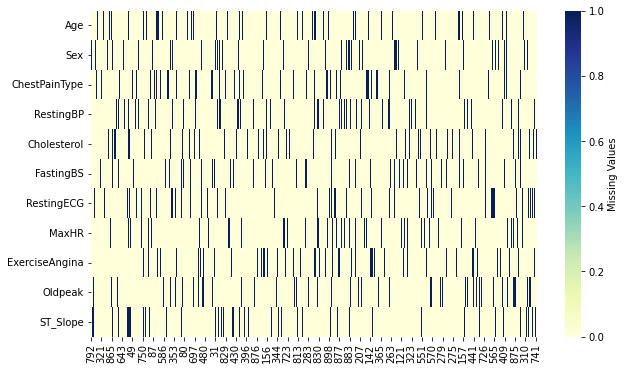

In [16]:
#Visualizing heatmap for missing in dataframe

plt.figure(figsize=(10,6))
sns.heatmap(X_train_heart_10.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Values'})

<AxesSubplot:>

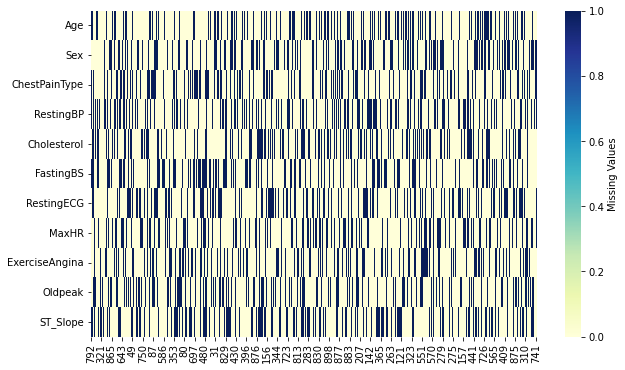

In [17]:
#Visualizing heatmap for missing in dataframe

plt.figure(figsize=(10,6))
sns.heatmap(X_train_heart_30.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Values'})

<AxesSubplot:>

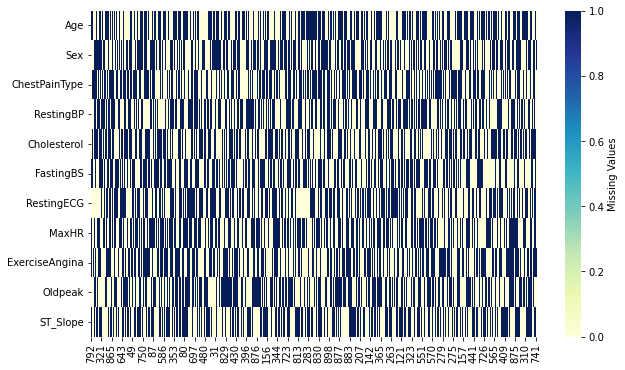

In [18]:
#Visualizing heatmap for missing in dataframe

plt.figure(figsize=(10,6))
sns.heatmap(X_train_heart_50.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Values'})

## Encoding the dataset
Create a function for encoding and apply it on X_train and X_test.

In [19]:
def one_hot_encode(df):
    for c in df.columns:
        if df[c].dtype=='object': 
            dummies = pd.get_dummies(df[c], prefix=c, drop_first=True)
            df = pd.concat([df, dummies], axis=1)
            df = df.drop(c, axis=1)
    return df

In [20]:
# Encode Training and testing feature sets
X_train_heart = one_hot_encode(X_train_heart)
X_test_heart = one_hot_encode(X_test_heart)

## Normalise the dataset
Create a function for normalization and apply it on X_train and X_test. Here we are using StandardScalar() as it follows standard normal distribution. Therefore, it makes mean = 0 and scales the data to unit variance.

In [21]:
def stdscalar(a):
    # Scale a
    scaler = StandardScaler()
    scaler.fit(a)
    a = pd.DataFrame(scaler.transform(a), index=a.index, columns=a.columns)
    
    return a

In [22]:
# Normalise Training and testing feature sets
X_train_heart = stdscalar(X_train_heart)
X_test_heart = stdscalar(X_test_heart)

## Data Imputation

### 1. Mean/Mode Imputation

In [23]:
def mean_mode_impute(data):
    
    df = data.copy()
    # numeric columns
    df.fillna(df.select_dtypes(include='number').mean().iloc[0], inplace=True)
    
    # categorical columns
    df.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)
    
    # One Hot encode df
    df = one_hot_encode(df)
    
    # Scale df
    df = stdscalar(df)
    
    return df

In [24]:
X_train_heart_1_mmi = mean_mode_impute(X_train_heart_1)
X_train_heart_1_mmi.drop(['Sex_F', 'ChestPainType_ASY', 'RestingECG_LVH', 'ExerciseAngina_N', 'ST_Slope_Down'], axis=1,inplace=True)

In [25]:
X_train_heart_1_mmi.isna().sum().sum()

0

In [26]:
X_train_heart_10_mmi = mean_mode_impute(X_train_heart_10)
X_train_heart_10_mmi.drop(['Sex_F', 'ChestPainType_ASY', 'RestingECG_LVH', 'ExerciseAngina_N', 'ST_Slope_Down'], axis=1,inplace=True)

In [27]:
X_train_heart_10_mmi.isna().sum().sum()

0

In [28]:
X_train_heart_30_mmi = mean_mode_impute(X_train_heart_30)
X_train_heart_30_mmi.drop(['Sex_F', 'ChestPainType_ASY', 'RestingECG_LVH', 'ExerciseAngina_N', 'ST_Slope_Down'], axis=1,inplace=True)

In [29]:
X_train_heart_30_mmi.isna().sum().sum()

0

In [30]:
X_train_heart_50_mmi = mean_mode_impute(X_train_heart_50)
X_train_heart_50_mmi.drop(['Sex_F', 'ChestPainType_ASY', 'RestingECG_LVH', 'ExerciseAngina_N', 'ST_Slope_Down'], axis=1,inplace=True)

In [31]:
X_train_heart_50_mmi.isna().sum().sum()

0

### 2. KNN Imputation

In [32]:
def KNN_impute(data):
    
    df = data.copy()
    
    categorical = df.select_dtypes(include= ['object']).columns.values.tolist()
    
    
    # Encode the data with label encoder
    encoders = dict()

    for col_name in df[categorical].columns:
        series = df[col_name]
        label_encoder = LabelEncoder()
        df[col_name] = pd.Series(
            label_encoder.fit_transform(series[series.notnull()]),
            index=series[series.notnull()].index
        )
        encoders[col_name] = label_encoder
    
    
    # Applying KNN imputation
    imputer = KNNImputer(n_neighbors=2, weights="uniform")
    df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns, index=df.index)
    
    
    # Convert dtype of categorical column to 'int' to inverse label encoding
    df[categorical] = df[categorical].astype(int)
    
    
    # Inverse the label encoding to get original categorical values
    for col in df[categorical].columns:
        df[col] = encoders[col].inverse_transform(df[col])
                
    # One Hot encode df
    df = one_hot_encode(df)
    
    # Scale df
    df = stdscalar(df)
    
    return df

In [33]:
X_train_heart_1_knn = KNN_impute(X_train_heart_1)

In [34]:
X_train_heart_1_knn.isna().sum().sum()

0

In [35]:
X_train_heart_10_knn = KNN_impute(X_train_heart_10)

In [36]:
X_train_heart_10_knn.isna().sum().sum()

0

In [37]:
X_train_heart_30_knn = KNN_impute(X_train_heart_30)

In [38]:
X_train_heart_30_knn.isna().sum().sum()

0

In [39]:
X_train_heart_50_knn = KNN_impute(X_train_heart_50)

In [40]:
X_train_heart_50_knn.isna().sum().sum()

0

### 3. Random Forest Imputation

In [41]:
def random_forest_impute(data):
    
    df = data.copy()
    
    categorical = df.select_dtypes(include= ['object']).columns.values
    numerical = df.select_dtypes(include= ['number']).columns.values
    
    # Encode the data with label encoder
    encoders = dict()

    for col_name in df[categorical].columns:
        series = df[col_name]
        label_encoder = LabelEncoder()
        df[col_name] = pd.Series(
            label_encoder.fit_transform(series[series.notnull()]),
            index=series[series.notnull()].index
        )
        encoders[col_name] = label_encoder
    
    
    # Impute the data with RandomForestRegressor for numerical features
    imp_num = IterativeImputer(estimator=RandomForestRegressor(),
                               initial_strategy='mean',
                               max_iter=10)
    
    # Impute the data with RandomForestClassifier for categorical features
    imp_cat = IterativeImputer(estimator=RandomForestClassifier(), 
                               initial_strategy='most_frequent',
                               max_iter=10)
    # Fit and transform
    df[numerical] = imp_num.fit_transform(df[numerical])
    df[categorical] = imp_cat.fit_transform(df[categorical]).astype(int)

    
    # Inverse the label encoding to get original categorical values
    for col in df[categorical].columns:
        df[col] = encoders[col].inverse_transform(df[col])
                           
    # One Hot encode df
    df = one_hot_encode(df)
    
    # Scale df
    df = stdscalar(df)
    
    return df

In [42]:
X_train_heart_1_rf = random_forest_impute(X_train_heart_1)

In [43]:
X_train_heart_1_rf.isna().sum().sum()

0

In [44]:
X_train_heart_10_rf = random_forest_impute(X_train_heart_10)

In [45]:
X_train_heart_10_rf.isna().sum().sum()

0

In [46]:
X_train_heart_30_rf = random_forest_impute(X_train_heart_30)

In [47]:
X_train_heart_30_rf.isna().sum().sum()

0

In [48]:
X_train_heart_50_rf = random_forest_impute(X_train_heart_50)

In [49]:
X_train_heart_50_rf.isna().sum().sum()

0

## Class Imbalance - SMOTE
SMOTE-Synthetic Minority Over-sampling Technique is a method used to tackle class imbalance. Here this method is applied  on training set before stimulating missing values and after stimulating missing values & applying data imputation method on that. 

Creating a function to apply SMOTE

In [50]:
def smote(X_train,Y_train):
    
    sm = SMOTE()
    
    x, y = sm.fit_resample(X_train,Y_train) 
    
    return x, y

### Applying smote on original dataset 

Original dataset means the dataset before stimulating missing values. Variables that store this information are "X_train_heart" and "y_train_heart".

In [51]:
X_train_heart_smote, y_train_heart_smote = smote(X_train_heart, y_train_heart)

In [52]:
y_train_heart_smote.value_counts()

1    412
0    412
Name: HeartDisease, dtype: int64

### Applying smote on imputed datasets

Imputed dataset means the dataset after stimulating missing values and applying imputation techniques.

#### Dataset with Mean/Mode Imputation
Variables that store this information starts as "X_train_heart_1_mmi" for 1% missingness fraction, "X_train_heart_10_mmi" for 10% missingness fraction, "X_train_heart_30_mmi" for 30% missingness fraction, "X_train_heart_50_mmi" for 50% missingness fraction while the target variable name is same for all which is "y_train_heart". 

In [53]:
X_train_heart_1_mmi_smote, y_train_heart_1_mmi_smote = smote(X_train_heart_1_mmi, y_train_heart)

In [54]:
y_train_heart_1_mmi_smote.value_counts()

1    412
0    412
Name: HeartDisease, dtype: int64

In [55]:
X_train_heart_10_mmi_smote, y_train_heart_10_mmi_smote = smote(X_train_heart_10_mmi, y_train_heart)

In [56]:
X_train_heart_30_mmi_smote, y_train_heart_30_mmi_smote = smote(X_train_heart_30_mmi, y_train_heart)

In [57]:
X_train_heart_50_mmi_smote, y_train_heart_50_mmi_smote = smote(X_train_heart_50_mmi, y_train_heart)

#### Dataset with KNN Imputation. 
Variables that store this information starts as "X_train_heart_1_knn" for 1% missingness fraction, "X_train_heart_10_knn" for 10% missingness fraction, "X_train_heart_30_knn" for 30% missingness fraction, "X_train_heart_50_knn" for 50% missingness fraction while the target variable name is same for all which is "y_train_heart". 

In [58]:
X_train_heart_1_knn_smote, y_train_heart_1_knn_smote = smote(X_train_heart_1_knn, y_train_heart)

In [59]:
X_train_heart_10_knn_smote, y_train_heart_10_knn_smote = smote(X_train_heart_10_knn, y_train_heart)

In [60]:
X_train_heart_30_knn_smote, y_train_heart_30_knn_smote = smote(X_train_heart_30_knn, y_train_heart)

In [61]:
X_train_heart_50_knn_smote, y_train_heart_50_knn_smote = smote(X_train_heart_50_knn, y_train_heart)

#### Dataset with Random Forest Imputation. 
Variables that store this information starts as "X_train_heart_1_rf" for 1% missingness fraction, "X_train_heart_10_rf" for 10% missingness fraction, "X_train_heart_30_rf" for 30% missingness fraction, "X_train_heart_50_rf" for 50% missingness fraction while the target variable name is same for all which is "y_train_heart". 

In [62]:
X_train_heart_1_rf_smote, y_train_heart_1_rf_smote = smote(X_train_heart_1_rf, y_train_heart)

In [63]:
X_train_heart_10_rf_smote, y_train_heart_10_rf_smote = smote(X_train_heart_10_rf, y_train_heart)

In [64]:
X_train_heart_30_rf_smote, y_train_heart_30_rf_smote = smote(X_train_heart_30_rf, y_train_heart)

In [65]:
X_train_heart_50_rf_smote, y_train_heart_50_rf_smote = smote(X_train_heart_50_rf, y_train_heart)

Testing set is same for all above i.e., X_test_heart and y_test_heart. The resulting variables according to imputation methods are


| Type | X_train | y_train |
| :-: | :-: | :-: |
| Original Dataset | X_train_heart_smote | y_train_heart_smote |
| Mean/Mode Imputed Dataset | X_train_heart_1_mmi_smote | y_train_heart_1_mmi_smote |
| | X_train_heart_10_mmi_smote | y_train_heart_10_mmi_smote |
| | X_train_heart_30_mmi_smote | y_train_heart_30_mmi_smote |
| | X_train_heart_50_mmi_smote | y_train_heart_50_mmi_smote |
| KNN Imputed Dataset | X_train_heart_1_knn_smote | y_train_heart_1_knn_smote |
| | X_train_heart_10_knn_smote | y_train_heart_10_knn_smote |
| | X_train_heart_30_knn_smote | y_train_heart_30_knn_smote |
| | X_train_heart_50_knn_smote | y_train_heart_50_knn_smote |
| Random Forest Imputed Dataset | X_train_heart_1_rf_smote | y_train_heart_1_rf_smote |
| | X_train_heart_10_rf_smote | y_train_heart_10_rf_smote |
| | X_train_heart_30_rf_smote | y_train_heart_30_rf_smote |
| | X_train_heart_50_rf_smote | y_train_heart_50_rf_smote |

Testing set is same for all above i.e., X_test_heart and y_test_heart. The resulting variables of training set according to missingness fractions are


| Missingness Fraction | X_train | y_train |
| :-: | :-: | :-: |
| 0% | X_train_heart_smote | y_train_heart_smote |
| 1% | X_train_heart_1_mmi_smote | y_train_heart_1_mmi_smote |
| | X_train_heart_1_knn_smote | y_train_heart_1_knn_smote |
| | X_train_heart_1_rf_smote | y_train_heart_1_rf_smote |
| 10% | X_train_heart_10_mmi_smote | y_train_heart_10_mmi_smote |
| | X_train_heart_10_knn_smote | y_train_heart_10_knn_smote |
| | X_train_heart_10_rf_smote | y_train_heart_10_rf_smote |
| 30% | X_train_heart_30_mmi_smote | y_train_heart_30_mmi_smote |
| | X_train_heart_30_knn_smote | y_train_heart_30_knn_smote |
| | X_train_heart_30_rf_smote | y_train_heart_30_rf_smote |
| 50% | X_train_heart_50_mmi_smote | y_train_heart_50_mmi_smote |
| | X_train_heart_50_knn_smote | y_train_heart_50_knn_smote |
| | X_train_heart_50_rf_smote | y_train_heart_50_rf_smote |

## Modelling

Create a function for model training, prediction and to obtain accuracy, f1_score, auc and plot confusion matrix.

In [66]:
def model(mf, im, X_train,y_train,X_test, y_test):
    
    rf_cls =  RandomForestClassifier()
    rf_cls.fit(X_train, y_train)
    print("Model trained.")
    
    
    result = {}
    print("\nModel Performance\n-----------------")
    y_pred = rf_cls.predict(X_test)

    #use model to predict probability that given y value is 1
    y_pred_proba = rf_cls.predict_proba(X_test)[::,1]
    
    print(
        "\n" + "\n\t\t\t\t\tF1-Score: {:.5f}\n\t\t\t\t\t     AUC: {:.5f}\n\t\t\t\t"\
        .format(f1_score(y_test, y_pred), metrics.roc_auc_score(y_test, y_pred_proba))
    )
    
    result[lst[0]] = [mf,im,"%.4f" % f1_score(y_test, y_pred), "%.4f" % metrics.roc_auc_score(y_test, y_pred_proba)]
    lst.pop(0)
        
    # Print the confusion matrix using Matplotlib
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

    return result

Creating a dictionary to store all the results and then make one dataframe from that dictionary.

In [67]:
# Create a list for index of dataframe
lst = list(range(13))

# Create a dictionary to store result
result_h = {}

### Model with 0% missingness fraction

Model trained.

Model Performance
-----------------


					F1-Score: 0.86567
					     AUC: 0.93205
				


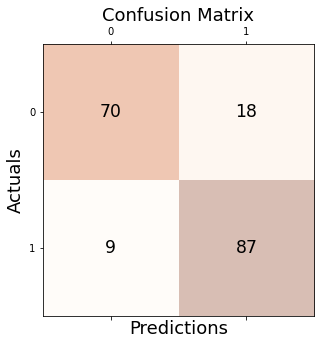

In [68]:
result_0 = model('0%', 'None', X_train_heart_smote, y_train_heart_smote, X_test_heart, y_test_heart)

In [69]:
# update the result to the result dictionary
result_h.update(result_0)

### Model with 1% missingness fraction 

#### With Mean/Mode Imputation

Model trained.

Model Performance
-----------------


					F1-Score: 0.85854
					     AUC: 0.92679
				


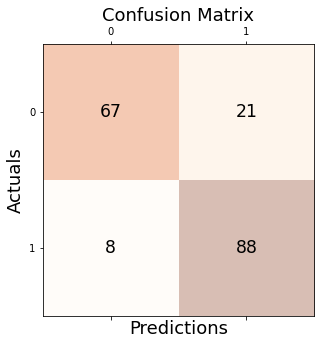

In [70]:
result_1_mmi = model('1%', 'Mean/Mode', X_train_heart_1_mmi_smote, y_train_heart_1_mmi_smote, X_test_heart, y_test_heart)

In [71]:
# update the result to the result dictionary
result_h.update(result_1_mmi)

#### With KNN Imputation

Model trained.

Model Performance
-----------------


					F1-Score: 0.88205
					     AUC: 0.93673
				


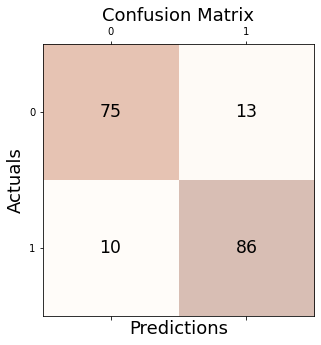

In [72]:
result_1_knn = model('1%', 'KNN', X_train_heart_1_knn_smote, y_train_heart_1_knn_smote, X_test_heart, y_test_heart)

In [73]:
# update the result to the result dictionary
result_h.update(result_1_knn)

#### With Random Forest Imputation

Model trained.

Model Performance
-----------------


					F1-Score: 0.86294
					     AUC: 0.93383
				


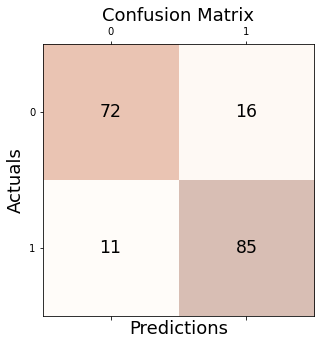

In [74]:
result_1_rf = model('1%', 'Random Forest', X_train_heart_1_rf_smote, y_train_heart_1_rf_smote, X_test_heart, y_test_heart)

In [75]:
# update the result to the result dictionary
result_h.update(result_1_rf)

### Model with 10% missingness fraction

#### With Mean/Mode Imputation

Model trained.

Model Performance
-----------------


					F1-Score: 0.85854
					     AUC: 0.91471
				


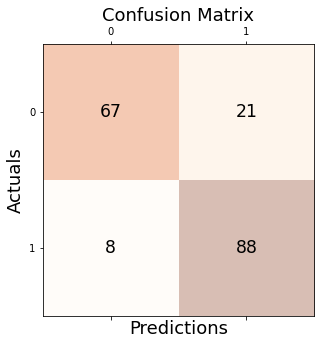

In [76]:
result_10_mmi = model('10%', 'Mean/Mode', X_train_heart_10_mmi_smote, y_train_heart_10_mmi_smote, X_test_heart, y_test_heart)

In [77]:
# update the result to the result dictionary
result_h.update(result_10_mmi)

#### With KNN Imputation

Model trained.

Model Performance
-----------------


					F1-Score: 0.86294
					     AUC: 0.92312
				


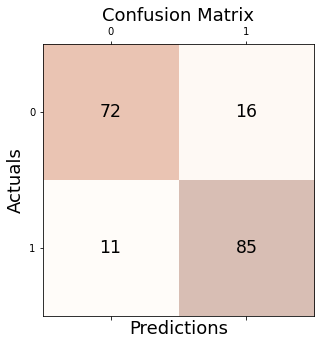

In [78]:
result_10_knn = model('10%', 'KNN', X_train_heart_10_knn_smote, y_train_heart_10_knn_smote, X_test_heart, y_test_heart)

In [79]:
# update the result to the result dictionary
result_h.update(result_10_knn)

#### With Random Forest Imputation

Model trained.

Model Performance
-----------------


					F1-Score: 0.88000
					     AUC: 0.93501
				


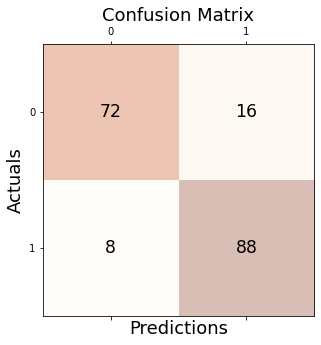

In [80]:
result_10_rf = model('10%', 'Random Forest', X_train_heart_10_rf_smote, y_train_heart_10_rf_smote, X_test_heart, y_test_heart)

In [81]:
# update the result to the result dictionary
result_h.update(result_10_rf)

### Model with 30% missingness fraction

#### With Mean/Mode Imputation

Model trained.

Model Performance
-----------------


					F1-Score: 0.83249
					     AUC: 0.87737
				


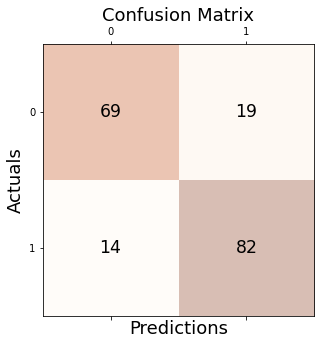

In [82]:
result_30_mmi = model('30%', 'Mean/Mode', X_train_heart_30_mmi_smote, y_train_heart_30_mmi_smote, X_test_heart, y_test_heart)

In [83]:
# update the result to the result dictionary
result_h.update(result_30_mmi)

#### With KNN Imputation

Model trained.

Model Performance
-----------------


					F1-Score: 0.84492
					     AUC: 0.92069
				


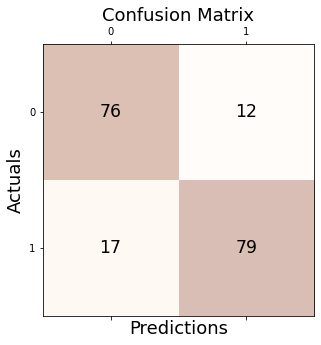

In [84]:
result_30_knn = model('30%', 'KNN', X_train_heart_30_knn_smote, y_train_heart_30_knn_smote, X_test_heart, y_test_heart)

In [85]:
# update the result to the result dictionary
result_h.update(result_30_knn)

#### With Random Forest Imputation

Model trained.

Model Performance
-----------------


					F1-Score: 0.86010
					     AUC: 0.91738
				


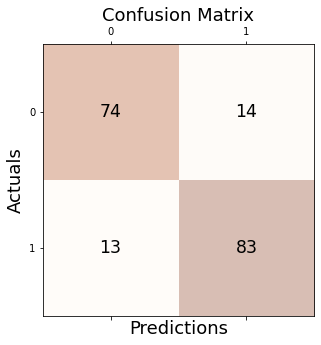

In [86]:
result_30_rf = model('30%', 'Random Forest', X_train_heart_30_rf_smote, y_train_heart_30_rf_smote, X_test_heart, y_test_heart)

In [87]:
# update the result to the result dictionary
result_h.update(result_30_rf)

### Model with 50% missingness fraction

#### With Mean/Mode Imputation

Model trained.

Model Performance
-----------------


					F1-Score: 0.66242
					     AUC: 0.88222
				


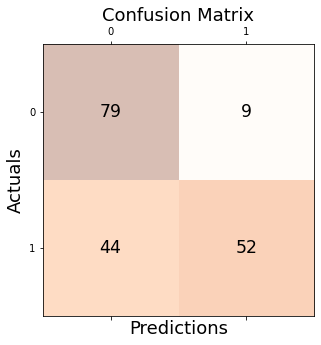

In [88]:
result_50_mmi = model('50%', 'Mean/Mode', X_train_heart_50_mmi_smote, y_train_heart_50_mmi_smote, X_test_heart, y_test_heart)

In [89]:
# update the result to the result dictionary
result_h.update(result_50_mmi)

#### With KNN Imputation

Model trained.

Model Performance
-----------------


					F1-Score: 0.84422
					     AUC: 0.91554
				


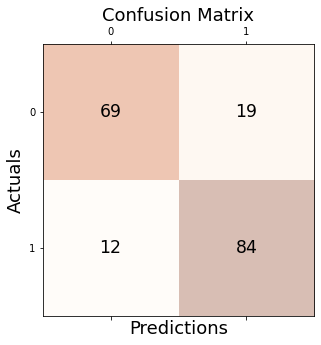

In [90]:
result_50_knn = model('50%', 'KNN', X_train_heart_50_knn_smote, y_train_heart_50_knn_smote, X_test_heart, y_test_heart)

In [91]:
# update the result to the result dictionary
result_h.update(result_50_knn)

#### With Random Forest Imputation

Model trained.

Model Performance
-----------------


					F1-Score: 0.81768
					     AUC: 0.91791
				


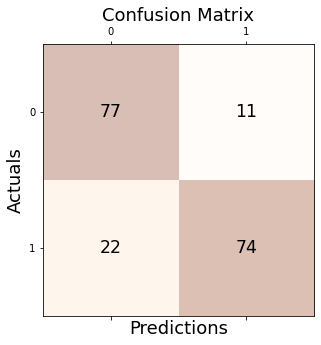

In [92]:
result_50_rf = model('50%', 'Random Forest', X_train_heart_50_rf_smote, y_train_heart_50_rf_smote, X_test_heart, y_test_heart)

In [93]:
# update the result to the result dictionary
result_h.update(result_50_rf)

## Result

In [94]:
result_heart = pd.DataFrame.from_dict(data = result_h, orient='index',columns=['Missingness Fraction','Imputation method', 'F1_Score', 'AUC'])

In [95]:
result_heart

,Missingness Fraction,Imputation method,F1_Score,AUC
0,0%,None,0.8657,0.9321
1,1%,Mean/Mode,0.8585,0.9268
2,1%,KNN,0.8821,0.9367
3,1%,Random Forest,0.8629,0.9338
4,10%,Mean/Mode,0.8585,0.9147
5,10%,KNN,0.8629,0.9231
6,10%,Random Forest,0.8800,0.9350
7,30%,Mean/Mode,0.8325,0.8774
8,30%,KNN,0.8449,0.9207
9,30%,Random Forest,0.8601,0.9174


# Stroke Dataset

## Reading in the Dataset

In [96]:
df_stroke = pd.read_csv("Stroke.csv")

In [97]:
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [98]:
df_stroke.drop(df_stroke.loc[df_stroke['gender']=='Other'].index, inplace=True)
df_stroke.drop('id', axis=1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
3421,Male,82,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
3422,Female,57,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
3423,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
3424,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


### Checking duplicate entries in the datasets.

In [99]:
df_stroke.duplicated().any()

False

>The stroke dataset does not have any duplicate entries. Good to go for the next step.

### Examining the Target column 

>For each patient in the dataset, we need to create a model that predicts whether or not the patients had stroke. Hence stroke is that target column in the dataset. Let's examine the Distribution of the target column.

In [100]:
df_stroke['stroke'].value_counts()

0    3245
1     180
Name: stroke, dtype: int64

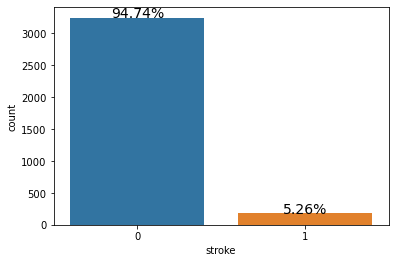

In [101]:
s = sns.countplot(x = 'stroke',data = df_stroke)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(df_stroke)*100),
            ha="center", fontsize=14)

Here:
* 0: No Stroke while 
* 1: Stroke. 

Clearly, less people had Stroke.

### Checking Missing Values

Checking if dataset have any missing values or not. If dataset don't have any missing values we will stimulate missing values. 

In [102]:
df_stroke.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Splitting the datasets into train and test sets

Calling the TrainTestSplit function which is already created above.

In [103]:
# Applying TrainTestSplit function to stroke dataset
X_train_stroke, X_test_stroke, y_train_stroke, y_test_stroke = TrainTestSplit(df_stroke)

## Stimulate missing values

Stimulate missing values only in training set of the dataset.

Calling the missing_values function to stimulate missing values with missingness fraction of 1%, 10%, 30% and 50%. Apply this function to feature set of training set.

In [104]:
# Applying the function on training set of stroke dataset
X_train_stroke_1, X_train_stroke_10, X_train_stroke_30, X_train_stroke_50 = missing_values(X_train_stroke)

Check the missingness fraction

In [105]:
# Stroke training set
print('For Stroke training set')
print('  X_train_stroke_1 =',(X_train_stroke_1.isna().sum()*100/len(X_train_stroke)).mean())
print('  X_train_stroke_10 =',(X_train_stroke_10.isna().sum()*100/len(X_train_stroke)).mean())
print('  X_train_stroke_30 =',(X_train_stroke_30.isna().sum()*100/len(X_train_stroke)).mean())
print('  X_train_stroke_50 =',(X_train_stroke_50.isna().sum()*100/len(X_train_stroke)).mean())

For Stroke training set
  X_train_stroke_1 = 0.9854014598540146
  X_train_stroke_10 = 10.0
  X_train_stroke_30 = 30.0
  X_train_stroke_50 = 50.0


Visualize newly formed datasets.

<AxesSubplot:>

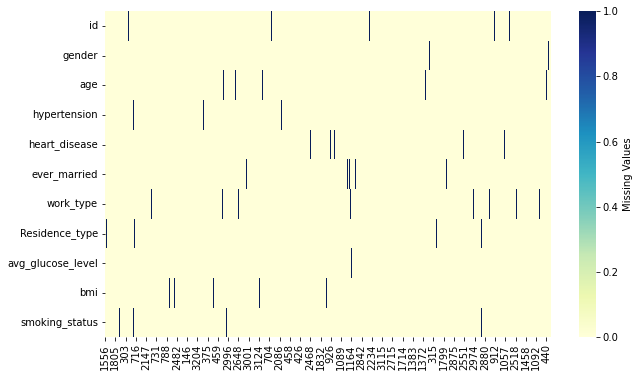

In [106]:
#Visualizing heatmap for missing in dataframe

plt.figure(figsize=(10,6))
sns.heatmap(X_train_stroke_1.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Values'})

<AxesSubplot:>

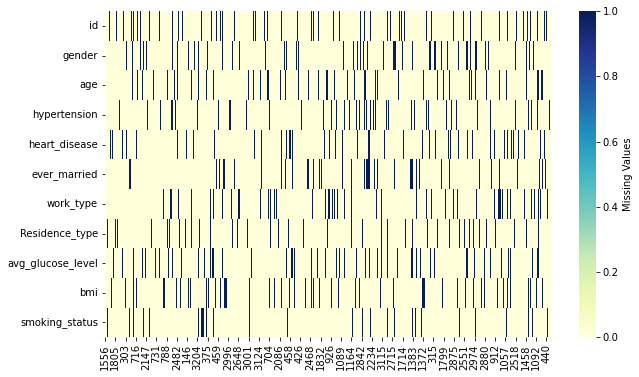

In [107]:
#Visualizing heatmap for missing in dataframe

plt.figure(figsize=(10,6))
sns.heatmap(X_train_stroke_10.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Values'})

<AxesSubplot:>

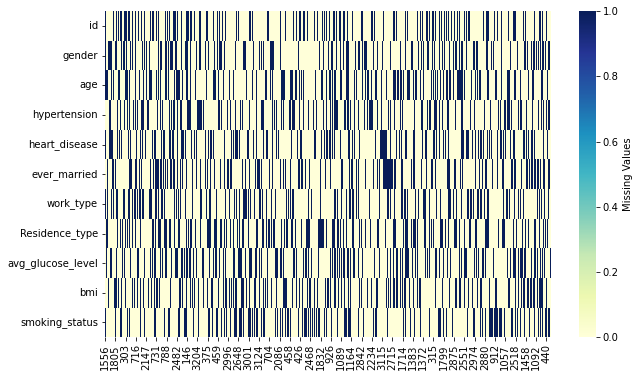

In [108]:
#Visualizing heatmap for missing in dataframe

plt.figure(figsize=(10,6))
sns.heatmap(X_train_stroke_30.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Values'})

<AxesSubplot:>

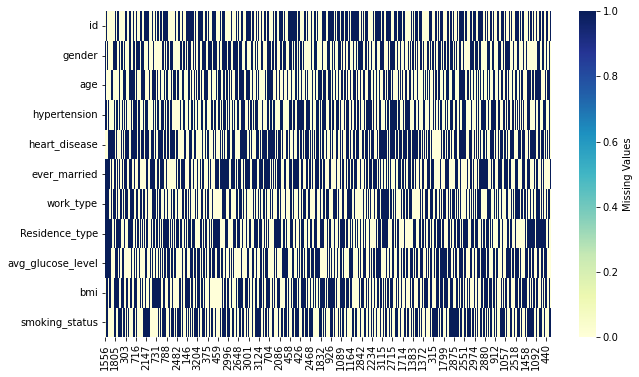

In [109]:
#Visualizing heatmap for missing in dataframe

plt.figure(figsize=(10,6))
sns.heatmap(X_train_stroke_50.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Values'})

## Encoding the dataset
Calling the one_hot_encode function for encoding and apply it on X_train and X_test.

In [110]:
# Encode Training and testing feature sets
X_train_stroke = one_hot_encode(X_train_stroke)
X_test_stroke = one_hot_encode(X_test_stroke)

## Normalise the dataset
Calling the stdscalar function for normalization of X_train and X_test.

In [111]:
# Normalise Training and testing feature sets
X_train_stroke = stdscalar(X_train_stroke)
X_test_stroke = stdscalar(X_test_stroke)

## Data Imputation

### 1. Mean/Mode Imputation

Calling the mean_mode_impute function to apply Mean/Mode Imputation.

In [112]:
X_train_stroke_1_mmi = mean_mode_impute(X_train_stroke_1)
X_train_stroke_1_mmi.drop(['gender_Female', 'ever_married_No', 'work_type_Govt_job', 'Residence_type_Rural', 'smoking_status_formerly smoked'], axis=1,inplace=True)

In [113]:
X_train_stroke_1_mmi.isna().sum().sum()

0

In [114]:
X_train_stroke_10_mmi = mean_mode_impute(X_train_stroke_10)
X_train_stroke_10_mmi.drop(['gender_Female', 'ever_married_No', 'work_type_Govt_job', 'Residence_type_Rural', 'smoking_status_formerly smoked'], axis=1,inplace=True)

In [115]:
X_train_stroke_10_mmi.isna().sum().sum()

0

In [116]:
X_train_stroke_30_mmi = mean_mode_impute(X_train_stroke_30)
X_train_stroke_30_mmi.drop(['gender_Female', 'ever_married_No', 'work_type_Govt_job', 'Residence_type_Rural', 'smoking_status_formerly smoked'], axis=1,inplace=True)

In [117]:
X_train_stroke_30_mmi.isna().sum().sum()

0

In [118]:
X_train_stroke_50_mmi = mean_mode_impute(X_train_stroke_50)
X_train_stroke_50_mmi.drop(['gender_Female', 'ever_married_No', 'work_type_Govt_job', 'Residence_type_Rural', 'smoking_status_formerly smoked'], axis=1,inplace=True)

In [119]:
X_train_stroke_50_mmi.isna().sum().sum()

0

### 2. KNN Imputation

Calling the KNN_impute function to apply KNN Imputation.

In [120]:
X_train_stroke_1_knn = KNN_impute(X_train_stroke_1)

In [121]:
X_train_stroke_1_knn.isna().sum().sum()

0

In [122]:
X_train_stroke_10_knn = KNN_impute(X_train_stroke_10)

In [123]:
X_train_stroke_10_knn.isna().sum().sum()

0

In [124]:
X_train_stroke_30_knn = KNN_impute(X_train_stroke_30)

In [125]:
X_train_stroke_30_knn.isna().sum().sum()

0

In [126]:
X_train_stroke_50_knn = KNN_impute(X_train_stroke_50)

In [127]:
X_train_stroke_50_knn.isna().sum().sum()

0

### 3. Random Forest Imputation

Calling the random_forest_impute function to apply Random Forest Imputation.

In [128]:
X_train_stroke_1_rf = random_forest_impute(X_train_stroke_1)

In [129]:
X_train_stroke_1_rf.isna().sum().sum()

0

In [130]:
X_train_stroke_10_rf = random_forest_impute(X_train_stroke_10)

In [131]:
X_train_stroke_10_rf.isna().sum().sum()

0

In [132]:
X_train_stroke_30_rf = random_forest_impute(X_train_stroke_30)

In [133]:
X_train_stroke_30_rf.isna().sum().sum()

0

In [134]:
X_train_stroke_50_rf = random_forest_impute(X_train_stroke_50)

In [135]:
X_train_stroke_50_rf.isna().sum().sum()

0

## Class Imbalance - SMOTE


Calling the smote function to apply SMOTE

### Applying smote on original dataset 

Original dataset means the dataset before stimulating missing values. Variables that store this information are "X_train_stroke" and "y_train_stroke".

In [136]:
X_train_stroke_smote, y_train_stroke_smote = smote(X_train_stroke, y_train_stroke)

In [137]:
y_train_stroke_smote.value_counts()

0    2593
1    2593
Name: stroke, dtype: int64

### Applying smote on imputed datasets

Imputed dataset means the dataset after stimulating missing values and applying imputation techniques.

#### Dataset with Mean/Mode Imputation
Variables that store this information starts as "X_train_stroke_1_mmi" for 1% missingness fraction, "X_train_stroke_10_mmi" for 10% missingness fraction, "X_train_stroke_30_mmi" for 30% missingness fraction, "X_train_stroke_50_mmi" for 50% missingness fraction while the target variable name is same for all which is "y_train_stroke". 

In [138]:
X_train_stroke_1_mmi_smote, y_train_stroke_1_mmi_smote = smote(X_train_stroke_1_mmi, y_train_stroke)

In [139]:
y_train_stroke_1_mmi_smote.value_counts()

0    2593
1    2593
Name: stroke, dtype: int64

In [140]:
X_train_stroke_10_mmi_smote, y_train_stroke_10_mmi_smote = smote(X_train_stroke_10_mmi, y_train_stroke)

In [141]:
X_train_stroke_30_mmi_smote, y_train_stroke_30_mmi_smote = smote(X_train_stroke_30_mmi, y_train_stroke)

In [142]:
X_train_stroke_50_mmi_smote, y_train_stroke_50_mmi_smote = smote(X_train_stroke_50_mmi, y_train_stroke)

#### Dataset with KNN Imputation. 
Variables that store this information starts as "X_train_stroke_1_knn" for 1% missingness fraction, "X_train_stroke_10_knn" for 10% missingness fraction, "X_train_stroke_30_knn" for 30% missingness fraction, "X_train_stroke_50_knn" for 50% missingness fraction while the target variable name is same for all which is "y_train_stroke".

In [143]:
X_train_stroke_1_knn_smote, y_train_stroke_1_knn_smote = smote(X_train_stroke_1_knn, y_train_stroke)

In [144]:
X_train_stroke_10_knn_smote, y_train_stroke_10_knn_smote = smote(X_train_stroke_10_knn, y_train_stroke)

In [145]:
X_train_stroke_30_knn_smote, y_train_stroke_30_knn_smote = smote(X_train_stroke_30_knn, y_train_stroke)

In [146]:
X_train_stroke_50_knn_smote, y_train_stroke_50_knn_smote = smote(X_train_stroke_50_knn, y_train_stroke)

#### Dataset with Random Forest Imputation. 
Variables that store this information starts as "X_train_stroke_1_rf" for 1% missingness fraction, "X_train_stroke_10_rf" for 10% missingness fraction, "X_train_stroke_30_rf" for 30% missingness fraction, "X_train_stroke_50_rf" for 50% missingness fraction while the target variable name is same for all which is "y_train_stroke".

In [147]:
X_train_stroke_1_rf_smote, y_train_stroke_1_rf_smote = smote(X_train_stroke_1_rf, y_train_stroke)

In [148]:
X_train_stroke_10_rf_smote, y_train_stroke_10_rf_smote = smote(X_train_stroke_10_rf, y_train_stroke)

In [149]:
X_train_stroke_30_rf_smote, y_train_stroke_30_rf_smote = smote(X_train_stroke_30_rf, y_train_stroke)

In [150]:
X_train_stroke_50_rf_smote, y_train_stroke_50_rf_smote = smote(X_train_stroke_50_rf, y_train_stroke)

Testing set is same for all above i.e., X_test_stroke and y_test_stroke. The resulting variables according to imputation methods are


| Type | X_train | y_train |
| :-: | :-: | :-: |
| Original Dataset | X_train_stroke_smote | y_train_stroke_smote |
| Mean/Mode Imputed Dataset | X_train_stroke_1_mmi_smote | y_train_stroke_1_mmi_smote |
| | X_train_stroke_10_mmi_smote | y_train_stroke_10_mmi_smote |
| | X_train_stroke_30_mmi_smote | y_train_stroke_30_mmi_smote |
| | X_train_stroke_50_mmi_smote | y_train_stroke_50_mmi_smote |
| KNN Imputed Dataset | X_train_stroke_1_knn_smote | y_train_stroke_1_knn_smote |
| | X_train_stroke_10_knn_smote | y_train_stroke_10_knn_smote |
| | X_train_stroke_30_knn_smote | y_train_stroke_30_knn_smote |
| | X_train_stroke_50_knn_smote | y_train_stroke_50_knn_smote |
| Random Forest Imputed Dataset | X_train_stroke_1_rf_smote | y_train_stroke_1_rf_smote |
| | X_train_stroke_10_rf_smote | y_train_stroke_10_rf_smote |
| | X_train_stroke_30_rf_smote | y_train_stroke_30_rf_smote |
| | X_train_stroke_50_rf_smote | y_train_stroke_50_rf_smote |

Testing set is same for all above i.e., X_test_stroke and y_test_stroke. The resulting variables of training set according to missingness fractions are


| Missingness Fraction | X_train | y_train |
| :-: | :-: | :-: |
| 0% | X_train_stroke_smote | y_train_stroke_smote |
| 1% | X_train_stroke_1_mmi_smote | y_train_stroke_1_mmi_smote |
| | X_train_stroke_1_knn_smote | y_train_stroke_1_knn_smote |
| | X_train_stroke_1_rf_smote | y_train_stroke_1_rf_smote |
| 10% | X_train_stroke_10_mmi_smote | y_train_stroke_10_mmi_smote |
| | X_train_stroke_10_knn_smote | y_train_stroke_10_knn_smote |
| | X_train_stroke_10_rf_smote | y_train_stroke_10_rf_smote |
| 30% | X_train_stroke_30_mmi_smote | y_train_stroke_30_mmi_smote |
| | X_train_stroke_30_knn_smote | y_train_stroke_30_knn_smote |
| | X_train_stroke_30_rf_smote | y_train_stroke_30_rf_smote |
| 50% | X_train_stroke_50_mmi_smote | y_train_stroke_50_mmi_smote |
| | X_train_stroke_50_knn_smote | y_train_stroke_50_knn_smote |
| | X_train_stroke_50_rf_smote | y_train_stroke_50_rf_smote |

## Modelling

Call the model function for model training, prediction and to obtain accuracy, f1_score, auc and plot confusion matrix.

Creating a dictionary to store all the results and then make one dataframe from that dictionary.

In [151]:
# Create a list for index of dataframe
lst = list(range(13))

# Create a dictionary to store result
result_s = {}

### Model with 0% missingness fraction

Model trained.

Model Performance
-----------------


					F1-Score: 0.17561
					     AUC: 0.71354
				


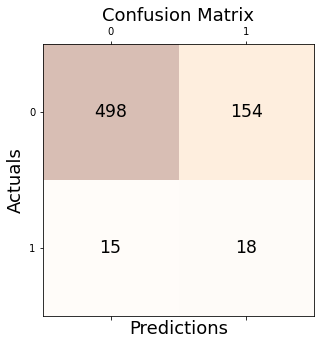

In [153]:
result_0 = model('0%', 'None', X_train_stroke_smote, y_train_stroke_smote, X_test_stroke, y_test_stroke)

In [154]:
# update the result to the result dictionary
result_s.update(result_0)

### Model with 1% missingness fraction 

#### With Mean/Mode Imputation

Model trained.

Model Performance
-----------------


					F1-Score: 0.06897
					     AUC: 0.70213
				


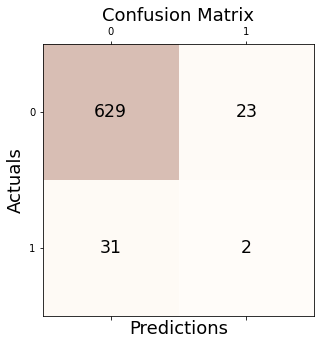

In [155]:
result_1_mmi = model('1%', 'Mean/Mode', X_train_stroke_1_mmi_smote, y_train_stroke_1_mmi_smote, X_test_stroke, y_test_stroke)

In [156]:
# update the result to the result dictionary
result_s.update(result_1_mmi)

#### With KNN Imputation

Model trained.

Model Performance
-----------------


					F1-Score: 0.14493
					     AUC: 0.68233
				


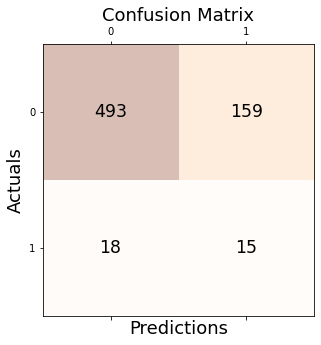

In [157]:
result_1_knn = model('1%', 'KNN', X_train_stroke_1_knn_smote, y_train_stroke_1_knn_smote, X_test_stroke, y_test_stroke)

In [158]:
# update the result to the result dictionary
result_s.update(result_1_knn)

#### With Random Forest Imputation

Model trained.

Model Performance
-----------------


					F1-Score: 0.17431
					     AUC: 0.69839
				


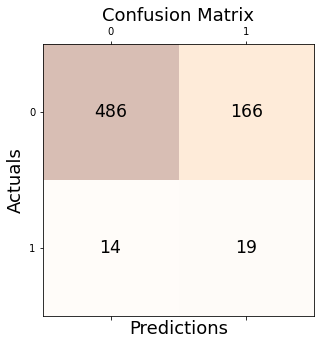

In [159]:
result_1_rf = model('1%', 'Random Forest', X_train_stroke_1_rf_smote, y_train_stroke_1_rf_smote, X_test_stroke, y_test_stroke)

In [160]:
# update the result to the result dictionary
result_s.update(result_1_rf)

### Model with 10% missingness fraction

#### With Mean/Mode Imputation

Model trained.

Model Performance
-----------------


					F1-Score: 0.16058
					     AUC: 0.69327
				


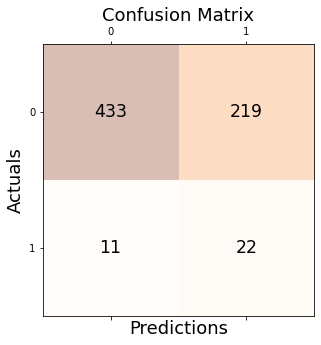

In [161]:
result_10_mmi = model('10%', 'Mean/Mode', X_train_stroke_10_mmi_smote, y_train_stroke_10_mmi_smote, X_test_stroke, y_test_stroke)

In [162]:
# update the result to the result dictionary
result_s.update(result_10_mmi)

#### With KNN Imputation

Model trained.

Model Performance
-----------------


					F1-Score: 0.13772
					     AUC: 0.66220
				


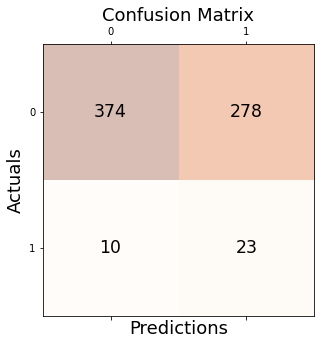

In [163]:
result_10_knn = model('10%', 'KNN', X_train_stroke_10_knn_smote, y_train_stroke_10_knn_smote, X_test_stroke, y_test_stroke)

In [164]:
# update the result to the result dictionary
result_s.update(result_10_knn)

#### With Random Forest Imputation

Model trained.

Model Performance
-----------------


					F1-Score: 0.16279
					     AUC: 0.65784
				


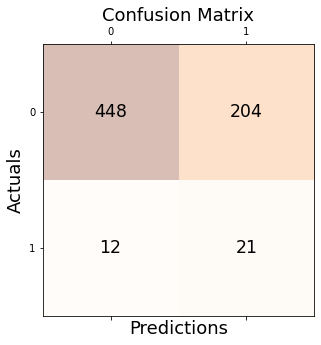

In [165]:
result_10_rf = model('10%', 'Random Forest', X_train_stroke_10_rf_smote, y_train_stroke_10_rf_smote, X_test_stroke, y_test_stroke)

In [166]:
# update the result to the result dictionary
result_s.update(result_10_rf)

### Model with 30% missingness fraction

#### With Mean/Mode Imputation

Model trained.

Model Performance
-----------------


					F1-Score: 0.10320
					     AUC: 0.51696
				


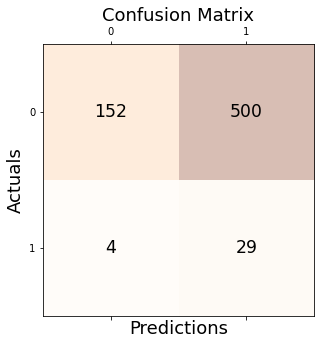

In [167]:
result_30_mmi = model('30%', 'Mean/Mode', X_train_stroke_30_mmi_smote, y_train_stroke_30_mmi_smote, X_test_stroke, y_test_stroke)

In [168]:
# update the result to the result dictionary
result_s.update(result_30_mmi)

#### With KNN Imputation

Model trained.

Model Performance
-----------------


					F1-Score: 0.10778
					     AUC: 0.59558
				


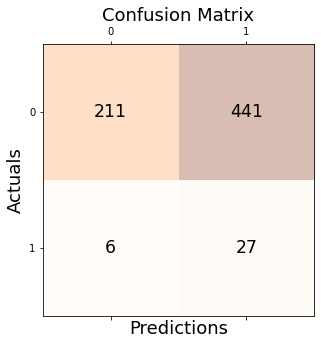

In [169]:
result_30_knn = model('30%', 'KNN', X_train_stroke_30_knn_smote, y_train_stroke_30_knn_smote, X_test_stroke, y_test_stroke)

In [170]:
# update the result to the result dictionary
result_s.update(result_30_knn)

#### With Random Forest Imputation

Model trained.

Model Performance
-----------------


					F1-Score: 0.10584
					     AUC: 0.61229
				


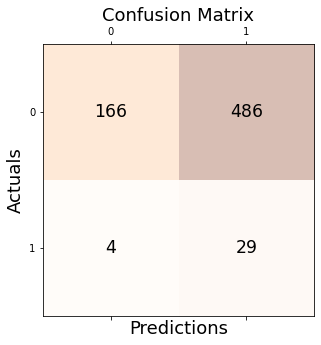

In [171]:
result_30_rf = model('30%', 'Random Forest', X_train_stroke_30_rf_smote, y_train_stroke_30_rf_smote, X_test_stroke, y_test_stroke)

In [172]:
# update the result to the result dictionary
result_s.update(result_30_rf)

### Model with 50% missingness fraction

#### With Mean/Mode Imputation

Model trained.

Model Performance
-----------------


					F1-Score: 0.10543
					     AUC: 0.46821
				


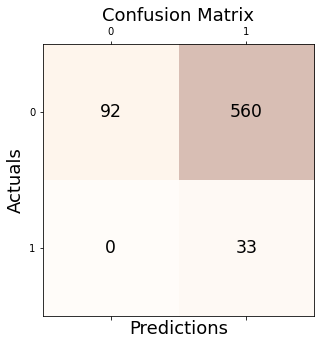

In [173]:
result_50_mmi = model('50%', 'Mean/Mode', X_train_stroke_50_mmi_smote, y_train_stroke_50_mmi_smote, X_test_stroke, y_test_stroke)

In [174]:
# update the result to the result dictionary
result_s.update(result_50_mmi)

#### With KNN Imputation

Model trained.

Model Performance
-----------------


					F1-Score: 0.09695
					     AUC: 0.56446
				


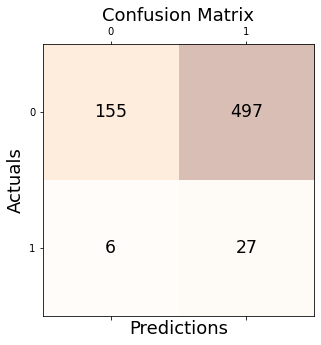

In [175]:
result_50_knn = model('50%', 'KNN', X_train_stroke_50_knn_smote, y_train_stroke_50_knn_smote, X_test_stroke, y_test_stroke)

In [176]:
# update the result to the result dictionary
result_s.update(result_50_knn)

#### With Random Forest Imputation

Model trained.

Model Performance
-----------------


					F1-Score: 0.11401
					     AUC: 0.60662
				


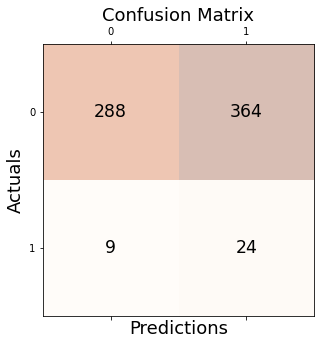

In [177]:
result_50_rf = model('50%', 'Random Forest', X_train_stroke_50_rf_smote, y_train_stroke_50_rf_smote, X_test_stroke, y_test_stroke)

In [178]:
# update the result to the result dictionary
result_s.update(result_50_rf)

## Result

In [179]:
result_stroke = pd.DataFrame.from_dict(data = result_s, orient='index',columns=['Missingness Fraction','Imputation method', 'F1_Score', 'AUC'])

In [180]:
result_stroke

,Missingness Fraction,Imputation method,F1_Score,AUC
0,0%,None,0.1756,0.7135
1,1%,Mean/Mode,0.0690,0.7021
2,1%,KNN,0.1449,0.6823
3,1%,Random Forest,0.1743,0.6984
4,10%,Mean/Mode,0.1606,0.6933
5,10%,KNN,0.1377,0.6622
6,10%,Random Forest,0.1628,0.6578
7,30%,Mean/Mode,0.1032,0.5170
8,30%,KNN,0.1078,0.5956
9,30%,Random Forest,0.1058,0.6123


# Software Defect Dataset

## Reading in the Dataset

In [287]:
df_swd = pd.read_csv("Nova SW.csv")

In [288]:
df_swd.head()

,fix,contains_bug,ns,nd,nf,entrophy,la,ld,lt,ndev,age,nuc,exp,rexp,sexp
0,True,True,1,2,2,0.970951,19,1,407.0,86,2.729178,177,350.5,1.274808,345
1,False,False,1,1,1,0.000000,0,1,96.0,324,2.089988,11,1122.0,1.478472,3
2,False,True,0,0,0,0.000000,0,0,0.0,0,0.000000,0,0.0,0.000000,0
3,False,False,1,1,1,0.000000,1,0,475.0,63,0.730139,47,343.0,2.369602,327
4,False,False,1,1,1,0.000000,1,1,245.0,58,97.918553,10,313.0,1.010213,291


### Checking duplicate entries in the datasets.

In [289]:
df_swd.duplicated().any()

True

Since software defect dataset have duplicate entries, will remove those entries as duplicate entries leads to many problems.

In [290]:
#Removing duplicate entries from software defect dataset
df_swd.drop_duplicates(inplace=True)

In [291]:
df_swd.duplicated().any()

False

### Examining the Target column 

>For each entries in the dataset, we need to create a model that predicts whether or not the software behaviour had defect. Hence contains_bug is that target column in the dataset. Let's examine the Distribution of the target column.

In [292]:
df_swd['contains_bug'].value_counts()

False    14598
True     12112
Name: contains_bug, dtype: int64

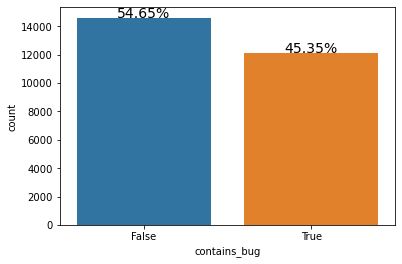

In [293]:
s = sns.countplot(x = 'contains_bug',data = df_swd)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(df_swd)*100),
            ha="center", fontsize=14)

Here:
* False: No defect in software 
* True: Defect in software. 

Clearly, less number of software has defect.

Rearrange the target column as the target column is at the 2nd position. And also our TrainTestSplit function will not get contains_bug column as target if we not rearrange and make it the last column.

In [294]:
# pop out the target column and store it in a variable
col = df_swd.pop("contains_bug")

# insert target column in the last
df_swd.insert(14, col.name, col)

In [295]:
df_swd.head()

,fix,ns,nd,nf,entrophy,la,ld,lt,ndev,age,nuc,exp,rexp,sexp,contains_bug
0,True,1,2,2,0.970951,19,1,407.0,86,2.729178,177,350.5,1.274808,345,True
1,False,1,1,1,0.000000,0,1,96.0,324,2.089988,11,1122.0,1.478472,3,False
2,False,0,0,0,0.000000,0,0,0.0,0,0.000000,0,0.0,0.000000,0,True
3,False,1,1,1,0.000000,1,0,475.0,63,0.730139,47,343.0,2.369602,327,False
4,False,1,1,1,0.000000,1,1,245.0,58,97.918553,10,313.0,1.010213,291,False


### Checking Missing Values

Checking if dataset have any missing values or not. If dataset don't have any missing values we will stimulate missing values. 

In [296]:
df_swd.isna().sum()

fix             0
ns              0
nd              0
nf              0
entrophy        0
la              0
ld              0
lt              0
ndev            0
age             0
nuc             0
exp             0
rexp            0
sexp            0
contains_bug    0
dtype: int64

## Splitting the datasets into train and test sets

Calling the TrainTestSplit function which is already created above.

In [297]:
# Applying TrainTestSplit function to software defect dataset
X_train_swd, X_test_swd, y_train_swd, y_test_swd = TrainTestSplit(df_swd)

## Stimulate missing values

Stimulate missing values only in training set of the dataset.

Calling the missing_values function to stimulate missing values with missingness fraction of 1%, 10%, 30% and 50%. Apply this function to feature set of training set.

In [298]:
# Applying above function on training set of software defect dataset
X_train_swd_1, X_train_swd_10, X_train_swd_30, X_train_swd_50 = missing_values(X_train_swd)

Check the missingness fraction

In [299]:
# Software defect training set
print('For Software defect training set')
print('  X_train_swd_1 =',(X_train_swd_1.isna().sum()*100/len(X_train_swd)).mean())
print('  X_train_swd_10 =',(X_train_swd_10.isna().sum()*100/len(X_train_swd)).mean())
print('  X_train_swd_30 =',(X_train_swd_30.isna().sum()*100/len(X_train_swd)).mean())
print('  X_train_swd_50 =',(X_train_swd_50.isna().sum()*100/len(X_train_swd)).mean())

For Software defect training set
  X_train_swd_1 = 1.001497566454511
  X_train_swd_10 = 10.00093597903407
  X_train_swd_30 = 29.99812804193186
  X_train_swd_50 = 50.0


Visualize newly formed datasets.

<AxesSubplot:>

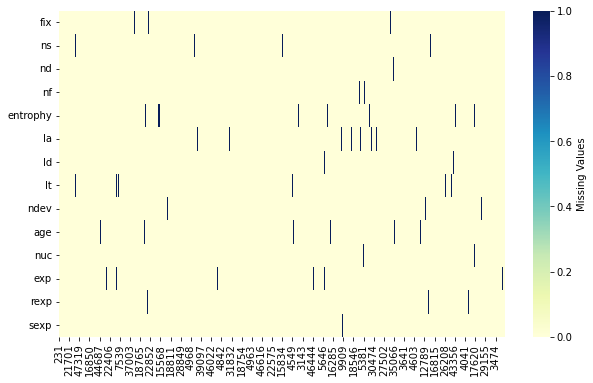

In [300]:
#Visualizing heatmap for missing in dataframe

plt.figure(figsize=(10,6))
sns.heatmap(X_train_swd_1.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Values'})

<AxesSubplot:>

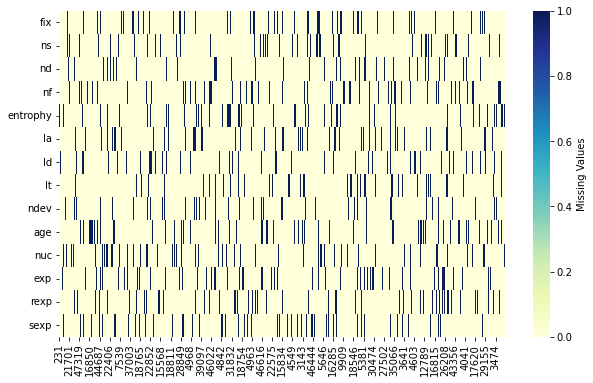

In [301]:
#Visualizing heatmap for missing in dataframe

plt.figure(figsize=(10,6))
sns.heatmap(X_train_swd_10.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Values'})

<AxesSubplot:>

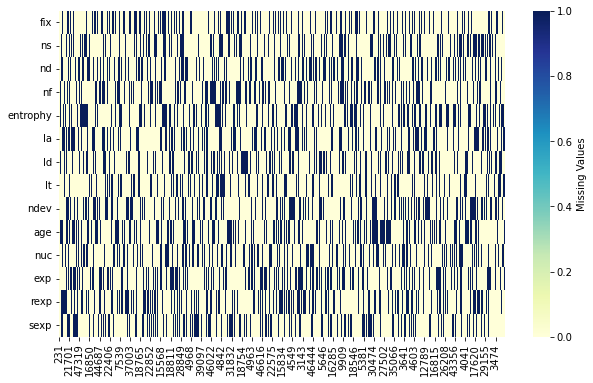

In [302]:
#Visualizing heatmap for missing in dataframe

plt.figure(figsize=(10,6))
sns.heatmap(X_train_swd_30.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Values'})

<AxesSubplot:>

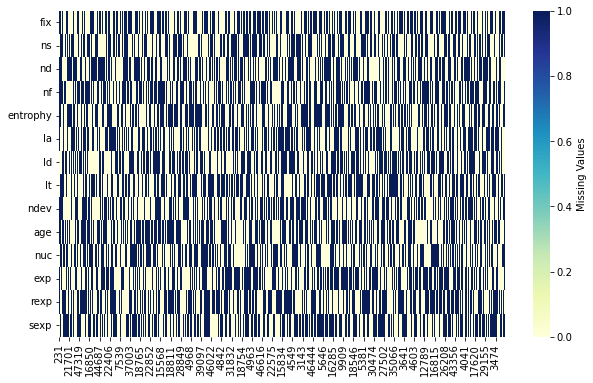

In [303]:
#Visualizing heatmap for missing in dataframe

plt.figure(figsize=(10,6))
sns.heatmap(X_train_swd_50.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Values'})

## Encoding the dataset
Since the dataset does not have any categorical columns, we does not need to encode the dataset.

In [304]:
# Encode Training and testing feature sets
X_train_swd = one_hot_encode(X_train_swd)
X_test_swd = one_hot_encode(X_test_swd)

## Normalise the dataset
Calling the stdscalar function for normalization of X_train and X_test.

In [305]:
# Normalise Training and testing feature sets
X_train_swd = stdscalar(X_train_swd)
X_test_swd = stdscalar(X_test_swd)

## Data Imputation

### 1. Mean/Mode Imputation

Calling the mean_mode_impute function to apply Mean/Mode Imputation.

In [306]:
X_train_swd_1_mmi = mean_mode_impute(X_train_swd_1)
X_train_swd_1_mmi.drop(X_train_swd_1_mmi.columns[-1], axis=1,inplace=True)

In [307]:
X_train_swd_1_mmi.isna().sum().sum()

0

In [308]:
X_train_swd_10_mmi = mean_mode_impute(X_train_swd_10)
X_train_swd_10_mmi.drop(X_train_swd_1_mmi.columns[-1], axis=1,inplace=True)

In [309]:
X_train_swd_10_mmi.isna().sum().sum()

0

In [310]:
X_train_swd_30_mmi = mean_mode_impute(X_train_swd_30)
X_train_swd_30_mmi.drop(X_train_swd_1_mmi.columns[-1], axis=1,inplace=True)

In [311]:
X_train_swd_30_mmi.isna().sum().sum()

0

In [312]:
X_train_swd_50_mmi = mean_mode_impute(X_train_swd_50)
X_train_swd_50_mmi.drop(X_train_swd_1_mmi.columns[-1], axis=1,inplace=True)

In [313]:
X_train_swd_50_mmi.isna().sum().sum()

0

### 2. KNN Imputation

Calling the KNN_impute function to apply KNN Imputation.

In [208]:
X_train_swd_1_knn = KNN_impute(X_train_swd_1)

In [209]:
X_train_swd_1_knn.isna().sum().sum()

0

In [210]:
X_train_swd_10_knn = KNN_impute(X_train_swd_10)

In [211]:
X_train_swd_10_knn.isna().sum().sum()

0

In [212]:
X_train_swd_30_knn = KNN_impute(X_train_swd_30)

In [213]:
X_train_swd_30_knn.isna().sum().sum()

0

In [214]:
X_train_swd_50_knn = KNN_impute(X_train_swd_50)

In [215]:
X_train_swd_50_knn.isna().sum().sum()

0

### 3. Random Forest Imputation

Calling the random_forest_impute function to apply Random Forest Imputation.

In [216]:
X_train_swd_1_rf = random_forest_impute(X_train_swd_1)

In [217]:
X_train_swd_1_rf.isna().sum().sum()

0

In [218]:
X_train_swd_10_rf = random_forest_impute(X_train_swd_10)

In [219]:
X_train_swd_10_rf.isna().sum().sum()

0

In [220]:
X_train_swd_30_rf = random_forest_impute(X_train_swd_30)

In [221]:
X_train_swd_30_rf.isna().sum().sum()

0

In [222]:
X_train_swd_50_rf = random_forest_impute(X_train_swd_50)

In [223]:
X_train_swd_50_rf.isna().sum().sum()

0

## Class Imbalance - SMOTE


Calling the smote function to apply SMOTE

### Applying smote on original dataset 

Original dataset means the dataset before stimulating missing values. Variables that store this information are "X_train_stroke" and "y_train_stroke".

In [225]:
X_train_swd_smote, y_train_swd_smote = smote(X_train_swd, y_train_swd)

In [226]:
y_train_swd_smote.value_counts()

True     11662
False    11662
Name: contains_bug, dtype: int64

### Applying smote on imputed datasets

Imputed dataset means the dataset after stimulating missing values and applying imputation techniques.

#### Dataset with Mean/Mode Imputation
Variables that store this information starts as "X_train_swd_1_mmi" for 1% missingness fraction, "X_train_swd_10_mmi" for 10% missingness fraction, "X_train_swd_30_mmi" for 30% missingness fraction, "X_train_swd_50_mmi" for 50% missingness fraction while the target variable name is same for all which is "y_train_stroke". 

In [321]:
X_train_swd_1_mmi_smote, y_train_swd_1_mmi_smote = smote(X_train_swd_1_mmi, y_train_swd)

In [322]:
y_train_swd_1_mmi_smote.value_counts()

True     11670
False    11670
Name: contains_bug, dtype: int64

In [323]:
X_train_swd_10_mmi_smote, y_train_swd_10_mmi_smote = smote(X_train_swd_10_mmi, y_train_swd)

In [324]:
X_train_swd_30_mmi_smote, y_train_swd_30_mmi_smote = smote(X_train_swd_30_mmi, y_train_swd)

In [325]:
X_train_swd_50_mmi_smote, y_train_swd_50_mmi_smote = smote(X_train_swd_50_mmi, y_train_swd)

#### Dataset with KNN Imputation. 
Variables that store this information starts as "X_train_swd_1_knn" for 1% missingness fraction, "X_train_swd_10_knn" for 10% missingness fraction, "X_train_swd_30_knn" for 30% missingness fraction, "X_train_swd_50_knn" for 50% missingness fraction while the target variable name is same for all which is "y_train_stroke".

In [232]:
X_train_swd_1_knn_smote, y_train_swd_1_knn_smote = smote(X_train_swd_1_knn, y_train_swd)

In [233]:
X_train_swd_10_knn_smote, y_train_swd_10_knn_smote = smote(X_train_swd_10_knn, y_train_swd)

In [234]:
X_train_swd_30_knn_smote, y_train_swd_30_knn_smote = smote(X_train_swd_30_knn, y_train_swd)

In [235]:
X_train_swd_50_knn_smote, y_train_swd_50_knn_smote = smote(X_train_swd_50_knn, y_train_swd)

#### Dataset with Random Forest Imputation. 
Variables that store this information starts as "X_train_swd_1_rf" for 1% missingness fraction, "X_train_swd_10_rf" for 10% missingness fraction, "X_train_swd_30_rf" for 30% missingness fraction, "X_train_swd_50_rf" for 50% missingness fraction while the target variable name is same for all which is "y_train_stroke".

In [236]:
X_train_swd_1_rf_smote, y_train_swd_1_rf_smote = smote(X_train_swd_1_rf, y_train_swd)

In [237]:
X_train_swd_10_rf_smote, y_train_swd_10_rf_smote = smote(X_train_swd_10_rf, y_train_swd)

In [238]:
X_train_swd_30_rf_smote, y_train_swd_30_rf_smote = smote(X_train_swd_30_rf, y_train_swd)

In [239]:
X_train_swd_50_rf_smote, y_train_swd_50_rf_smote = smote(X_train_swd_50_rf, y_train_swd)

Testing set is same for all above i.e., X_test_stroke and y_test_stroke. The resulting variables according to imputation methods are


| Type | X_train | y_train |
| :-: | :-: | :-: |
| Original Dataset | X_train_swd_smote | y_train_swd_smote |
| Mean/Mode Imputed Dataset | X_train_swd_1_mmi_smote | y_train_swd_1_mmi_smote |
| | X_train_swd_10_mmi_smote | y_train_swd_10_mmi_smote |
| | X_train_swd_30_mmi_smote | y_train_swd_30_mmi_smote |
| | X_train_swd_50_mmi_smote | y_train_swd_50_mmi_smote |
| KNN Imputed Dataset | X_train_swd_1_knn_smote | y_train_swd_1_knn_smote |
| | X_train_swd_10_knn_smote | y_train_swd_10_knn_smote |
| | X_train_swd_30_knn_smote | y_train_swd_30_knn_smote |
| | X_train_swd_50_knn_smote | y_train_swd_50_knn_smote |
| Random Forest Imputed Dataset | X_train_swd_1_rf_smote | y_train_swd_1_rf_smote |
| | X_train_swd_10_rf_smote | y_train_swd_10_rf_smote |
| | X_train_swd_30_rf_smote | y_train_swd_30_rf_smote |
| | X_train_swd_50_rf_smote | y_train_swd_50_rf_smote |

Testing set is same for all above i.e., X_test_stroke and y_test_stroke. The resulting variables of training set according to missingness fractions are


| Missingness Fraction | X_train | y_train |
| :-: | :-: | :-: |
| 0% | X_train_swd_smote | y_train_swd_smote |
| 1% | X_train_swd_1_mmi_smote | y_train_swd_1_mmi_smote |
| | X_train_swd_1_knn_smote | y_train_swd_1_knn_smote |
| | X_train_swd_1_rf_smote | y_train_swd_1_rf_smote |
| 10% | X_train_swd_10_mmi_smote | y_train_swd_10_mmi_smote |
| | X_train_swd_10_knn_smote | y_train_swd_10_knn_smote |
| | X_train_swd_10_rf_smote | y_train_swd_10_rf_smote |
| 30% | X_train_swd_30_mmi_smote | y_train_swd_30_mmi_smote |
| | X_train_swd_30_knn_smote | y_train_swd_30_knn_smote |
| | X_train_swd_30_rf_smote | y_train_swd_30_rf_smote |
| 50% | X_train_swd_50_mmi_smote | y_train_swd_50_mmi_smote |
| | X_train_swd_50_knn_smote | y_train_swd_50_knn_smote |
| | X_train_swd_50_rf_smote | y_train_swd_50_rf_smote |

## Modelling

Call the model function for model training, prediction and to obtain accuracy, f1_score, auc and plot confusion matrix.

Creating a dictionary to store all the results and then make one dataframe from that dictionary.

In [240]:
# Create a list for index of dataframe
lst = list(range(13))

# Create a dictionary to store result
result_sw = {}

### Model with 0% missingness fraction

Model trained.

Model Performance
-----------------


					F1-Score: 0.44289
					     AUC: 0.72894
				


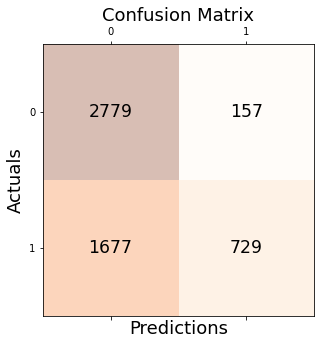

In [241]:
result_0 = model('0%', 'None', X_train_swd_smote, y_train_swd_smote, X_test_swd, y_test_swd)

In [242]:
# update the result to the result dictionary
result_sw.update(result_0)

### Model with 1% missingness fraction 

#### With Mean/Mode Imputation

Model trained.

Model Performance
-----------------


					F1-Score: 0.54373
					     AUC: 0.59810
				


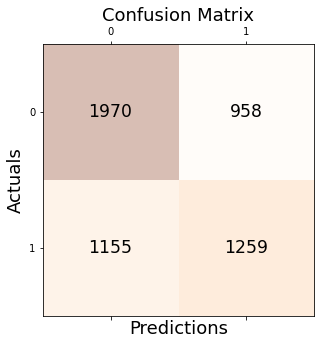

In [327]:
result_1_mmi = model('1%', 'Mean/Mode', X_train_swd_1_mmi_smote, y_train_swd_1_mmi_smote, X_test_swd, y_test_swd)

In [328]:
# update the result to the result dictionary
result_sw.update(result_1_mmi)

#### With KNN Imputation

Model trained.

Model Performance
-----------------


					F1-Score: 0.52977
					     AUC: 0.61654
				


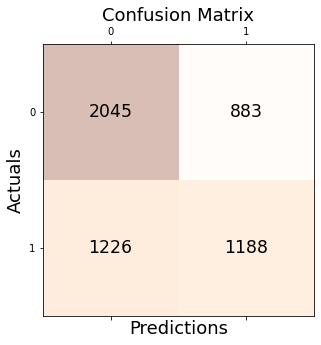

In [329]:
result_1_knn = model('1%', 'KNN', X_train_swd_1_knn_smote, y_train_swd_1_knn_smote, X_test_swd, y_test_swd)

In [330]:
# update the result to the result dictionary
result_sw.update(result_1_knn)

#### With Random Forest Imputation

Model trained.

Model Performance
-----------------


					F1-Score: 0.54402
					     AUC: 0.60971
				


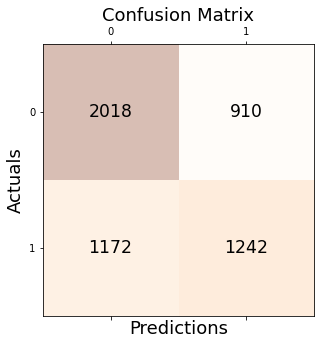

In [331]:
result_1_rf = model('1%', 'Random Forest', X_train_swd_1_rf_smote, y_train_swd_1_rf_smote, X_test_swd, y_test_swd)

In [332]:
# update the result to the result dictionary
result_sw.update(result_1_rf)

### Model with 10% missingness fraction

#### With Mean/Mode Imputation

Model trained.

Model Performance
-----------------


					F1-Score: 0.49227
					     AUC: 0.59403
				


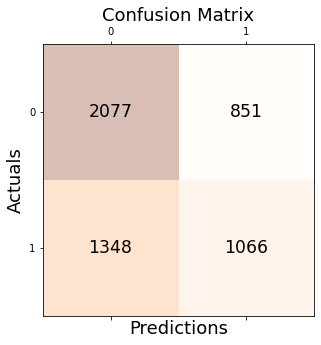

In [333]:
result_10_mmi = model('10%', 'Mean/Mode', X_train_swd_10_mmi_smote, y_train_swd_10_mmi_smote, X_test_swd, y_test_swd)

In [334]:
# update the result to the result dictionary
result_sw.update(result_10_mmi)

#### With KNN Imputation

Model trained.

Model Performance
-----------------


					F1-Score: 0.52799
					     AUC: 0.63914
				


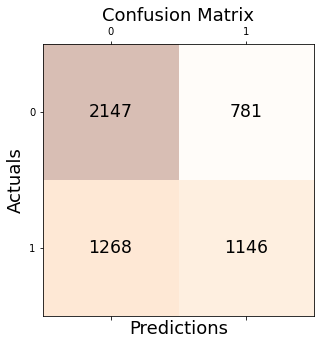

In [335]:
result_10_knn = model('10%', 'KNN', X_train_swd_10_knn_smote, y_train_swd_10_knn_smote, X_test_swd, y_test_swd)

In [336]:
# update the result to the result dictionary
result_sw.update(result_10_knn)

#### With Random Forest Imputation

Model trained.

Model Performance
-----------------


					F1-Score: 0.51611
					     AUC: 0.61634
				


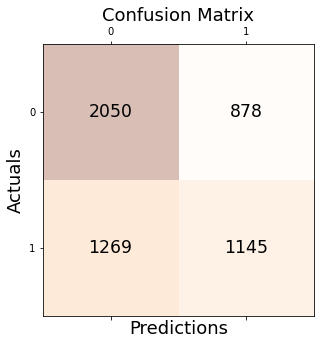

In [337]:
result_10_rf = model('10%', 'Random Forest', X_train_swd_10_rf_smote, y_train_swd_10_rf_smote, X_test_swd, y_test_swd)

In [338]:
# update the result to the result dictionary
result_sw.update(result_10_rf)

### Model with 30% missingness fraction

#### With Mean/Mode Imputation

Model trained.

Model Performance
-----------------


					F1-Score: 0.47304
					     AUC: 0.62169
				


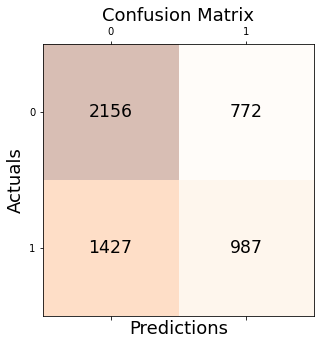

In [339]:
result_30_mmi = model('30%', 'Mean/Mode', X_train_swd_30_mmi_smote, y_train_swd_30_mmi_smote, X_test_swd, y_test_swd)

In [340]:
# update the result to the result dictionary
result_sw.update(result_30_mmi)

#### With KNN Imputation

Model trained.

Model Performance
-----------------


					F1-Score: 0.37357
					     AUC: 0.61755
				


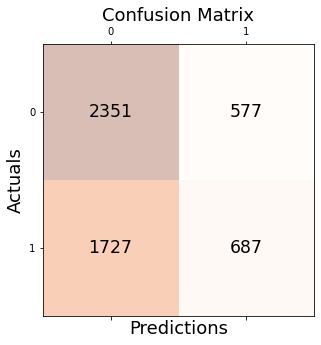

In [341]:
result_30_knn = model('30%', 'KNN', X_train_swd_30_knn_smote, y_train_swd_30_knn_smote, X_test_swd, y_test_swd)

In [342]:
# update the result to the result dictionary
result_sw.update(result_30_knn)

#### With Random Forest Imputation

Model trained.

Model Performance
-----------------


					F1-Score: 0.46850
					     AUC: 0.59979
				


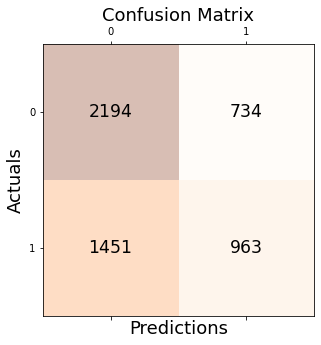

In [343]:
result_30_rf = model('30%', 'Random Forest', X_train_swd_30_rf_smote, y_train_swd_30_rf_smote, X_test_swd, y_test_swd)

In [344]:
# update the result to the result dictionary
result_sw.update(result_30_rf)

### Model with 50% missingness fraction

#### With Mean/Mode Imputation

Model trained.

Model Performance
-----------------


					F1-Score: 0.42498
					     AUC: 0.62244
				


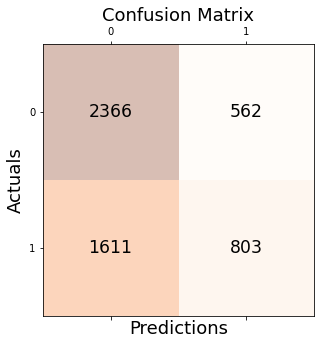

In [345]:
result_50_mmi = model('50%', 'Mean/Mode', X_train_swd_50_mmi_smote, y_train_swd_50_mmi_smote, X_test_swd, y_test_swd)

In [346]:
# update the result to the result dictionary
result_sw.update(result_50_mmi)

#### With KNN Imputation

Model trained.

Model Performance
-----------------


					F1-Score: 0.57441
					     AUC: 0.63073
				


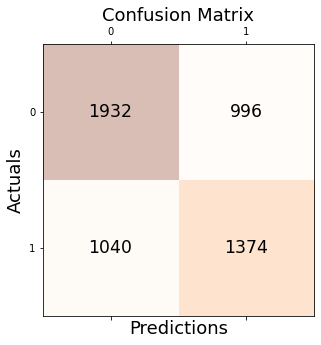

In [347]:
result_50_knn = model('50%', 'KNN', X_train_swd_50_knn_smote, y_train_swd_50_knn_smote, X_test_swd, y_test_swd)

In [348]:
# update the result to the result dictionary
result_sw.update(result_50_knn)

#### With Random Forest Imputation

Model trained.

Model Performance
-----------------


					F1-Score: 0.30036
					     AUC: 0.59847
				


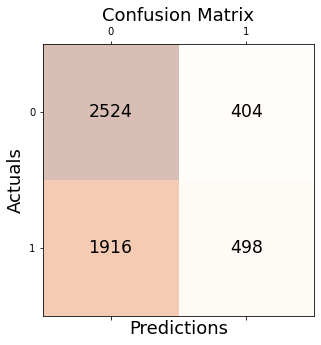

In [349]:
result_50_rf = model('50%', 'Random Forest', X_train_swd_50_rf_smote, y_train_swd_50_rf_smote, X_test_swd, y_test_swd)

In [350]:
# update the result to the result dictionary
result_sw.update(result_50_rf)

## Result

In [351]:
result_softD = pd.DataFrame.from_dict(data = result_sw, orient='index',columns=['Missingness Fraction','Imputation method', 'F1_Score', 'AUC'])

In [352]:
result_softD

,Missingness Fraction,Imputation method,F1_Score,AUC
0,0%,None,0.4429,0.7289
1,1%,Mean/Mode,0.5437,0.5981
2,1%,KNN,0.5298,0.6165
3,1%,Random Forest,0.5440,0.6097
4,10%,Mean/Mode,0.4923,0.5940
5,10%,KNN,0.5280,0.6391
6,10%,Random Forest,0.5161,0.6163
7,30%,Mean/Mode,0.4730,0.6217
8,30%,KNN,0.3736,0.6175
9,30%,Random Forest,0.4685,0.5998


Export result to excel for further analysis as this code will be run 3 times and average of all the run is reported.

In [353]:
with pd.ExcelWriter('1st Run.xlsx') as writer:  
    result_heart.to_excel(writer, sheet_name='Sheet_name_1')
    result_stroke.to_excel(writer, sheet_name='Sheet_name_2')
    result_softD.to_excel(writer, sheet_name='Sheet_name_3')